In [21]:
import numpy as np
import pandas as pd

In [2]:
data_dir = "."
model_label = "finnish_model_100_size"
from main import explain_using_raw_probs
indexed_Cs, zero_centered_Ps, id_to_morpho_tag, explanations, explanations_nparray_dict = \
            explain_using_raw_probs(model_label, data_dir)

In [3]:
indexed_Cs.keys()

dict_keys(['ORG', 'TIT', 'PER', 'TIM', 'LOC', 'DATE', 'PRO', 'MISC', 'EVENT', 'OUTSIDE'])

In [4]:

M = indexed_Cs['LOC'][0][0].shape[0]

In [5]:
indexed_Cs['LOC'].shape

(2040,)

In [6]:
indexed_Cs['LOC'][0].shape

(9, 89)

In [7]:
n_samples_0 = indexed_Cs['LOC'][0].shape[0]

In [8]:
indexed_Cs['LOC'][0][:3]

array([[ 1,  1,  1,  1,  0,  1,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [-1,  1,  1,  1,  0,  1,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, -1,  1,  1,  0,  1,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0

In [9]:
zero_centered_Ps['LOC'][0]

[0.0,
 0.003384900000000024,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00011309999999997711,
 0.0,
 0.0]

In [10]:
import seaborn as sns

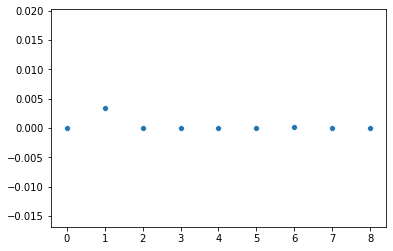

In [11]:
sns.scatterplot(range(n_samples_0), zero_centered_Ps['LOC'][0])

In [13]:
norm_explanations_nparray_dict = dict()
for entity_type in explanations_nparray_dict.keys():
    norm_explanations_nparray_dict[entity_type] = (explanations_nparray_dict[entity_type]-np.mean(explanations_nparray_dict[entity_type], axis=1, keepdims=True))/np.std(explanations_nparray_dict[entity_type], axis=1, keepdims=True)
    
concatenated_norm_explanations = None
norm_region_entity_types = []
for entity_type in norm_explanations_nparray_dict.keys():
    print(entity_type)
    norm_region_entity_types += [entity_type] * norm_explanations_nparray_dict[entity_type].shape[0]
    if concatenated_norm_explanations is None:
        concatenated_norm_explanations = norm_explanations_nparray_dict[entity_type]
    else:
        concatenated_norm_explanations = np.concatenate((concatenated_norm_explanations,
                                                         norm_explanations_nparray_dict[entity_type]),
                                                        axis=0)

concatenated_unnorm_explanations = None
unnorm_region_entity_types = []
for entity_type in explanations_nparray_dict.keys():
    print(entity_type)
    unnorm_region_entity_types += [entity_type] * explanations_nparray_dict[entity_type].shape[0]
    if concatenated_unnorm_explanations is None:
        concatenated_unnorm_explanations = explanations_nparray_dict[entity_type]
    else:
        concatenated_unnorm_explanations = np.concatenate((concatenated_unnorm_explanations,
                                                         explanations_nparray_dict[entity_type]),
                                                        axis=0)
                                                         
                                                         
                                                         
                                                         

ORG
TIT
PER
TIM
LOC
DATE
PRO
MISC
EVENT
OUTSIDE
ORG
TIT
PER
TIM
LOC
DATE
PRO
MISC
EVENT
OUTSIDE


In [19]:
def plot_single_case(entity_type, morpho_tag_id):
    single_case_X = concatenated_unnorm_explanations[:, morpho_tag_id].reshape([-1,1])
    single_case_y = np.array([int(x == entity_type) for x in unnorm_region_entity_types]).reshape([-1, 1])
    
    single_case_df = pd.DataFrame(np.concatenate((single_case_X, single_case_y), axis=1), columns=["X", "y"])
    
    sns.scatterplot(data=single_case_df, x="X", y="y", style="y", hue="y")

In [15]:
fig.savefig("Finnish-LOC-plot-binary-classification-problems.pdf")

NameError: name 'fig' is not defined

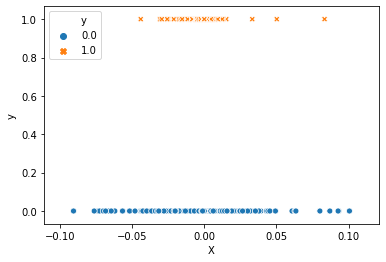

In [22]:
plot_single_case('LOC', 6)

In [41]:
import sklearn
from sklearn.cluster import SpectralClustering, MiniBatchKMeans
from collections import defaultdict

spectral_cmodels = {entity_tag: dict() for entity_tag in norm_explanations_nparray_dict.keys()}

mis_scores = defaultdict(list)

for entity_tag in norm_explanations_nparray_dict.keys():
    for morpho_tag_id, morpho_tag in id_to_morpho_tag.items():

        # spectral_cmodels[entity_tag][morpho_tag] = SpectralClustering(n_clusters=2,
        #                                                              eigen_solver="arpack", 
        #                                                              assign_labels="discretize", 
        #                                                              affinity="nearest_neighbors",
        #                                                             n_jobs=4)
        spectral_cmodels[entity_tag][morpho_tag] = MiniBatchKMeans(n_clusters=2, verbose=0)
        spectral_cmodels[entity_tag][morpho_tag].fit(concatenated_unnorm_explanations[:, morpho_tag_id].reshape([-1, 1]))
        
        binarized_y = [int(x == entity_tag) for x in unnorm_region_entity_types]
        
        mis_score = sklearn.metrics.mutual_info_score(binarized_y, 
                                                      spectral_cmodels[entity_tag][morpho_tag].labels_)
        mis_scores[entity_tag].append((entity_tag, morpho_tag, mis_score))
    print(("ENDED", entity_tag))
        


('ENDED', 'ORG')
('ENDED', 'TIT')
('ENDED', 'PER')
('ENDED', 'TIM')
('ENDED', 'LOC')
('ENDED', 'DATE')
('ENDED', 'PRO')
('ENDED', 'MISC')
('ENDED', 'EVENT')
('ENDED', 'OUTSIDE')


In [53]:
common_morpho_tags_mis_scores = dict()
for entity_tag in norm_explanations_nparray_dict.keys():
    print("\n".join([str(x) for x in sorted(mis_scores[entity_tag], key=lambda x: x[2], reverse=True)[:10]]))
    mean_explanations_finnish = sorted([(entity_tag, id_to_morpho_tag[idx], abs(mean_explanation_for_morpho_tag)) for idx, mean_explanation_for_morpho_tag in enumerate(list(np.mean(explanations_nparray_dict[entity_tag], axis=0)))],
       key=lambda x: x[2],
       reverse=True)[:10]
    common_morpho_tags_mis_scores[entity_type] = set([x[1] for x in sorted(mis_scores[entity_tag], key=lambda x: x[2], reverse=True)[:10]]).intersection(set([x[1] for x in mean_explanations_finnish]))
    print(common_morpho_tags_mis_scores[entity_type])
    print("====")

('ORG', 'NumType=Card', 0.010989978540495562)
('ORG', 'VerbForm=Inf', 0.00998515810892639)
('ORG', 'InfForm=2', 0.009935899014902688)
('ORG', 'Case=Par', 0.0073123141743958245)
('ORG', 'Derivation=Minen', 0.00625456663137218)
('ORG', 'Case=Nom', 0.005402219305568813)
('ORG', 'VerbForm=Part', 0.005367138066530221)
('ORG', 'Person[psor]=3', 0.00400551705077343)
('ORG', 'Derivation=Sti', 0.0037050854604428634)
('ORG', 'Case=Ins', 0.00366170209296452)
{'Case=Nom'}
====
('TIT', 'Foreign=Yes', 0.002009941701200753)
('TIT', 'Person=0', 0.0016760783851705128)
('TIT', 'Case=Ins', 0.0011647906869846764)
('TIT', 'Case=Ine', 0.0010738402573609862)
('TIT', 'InfForm=2', 0.0008909141678929353)
('TIT', 'Case=Ill', 0.0007002905890604802)
('TIT', 'Derivation=Minen', 0.0006792008343174602)
('TIT', 'Case=Par', 0.0006732549296087475)
('TIT', 'Tense=Pres', 0.0006196827578739475)
('TIT', 'NumType=Ord', 0.0005910202816931318)
{'Case=Par'}
====
('PER', 'Number=Sing', 0.014351352986040997)
('PER', 'Style=Coll',

In [56]:
import sklearn
from sklearn.cluster import SpectralClustering, MiniBatchKMeans
from collections import defaultdict

spectral_cmodels = {entity_tag: dict() for entity_tag in norm_explanations_nparray_dict.keys()}

mis_scores = defaultdict(list)

for entity_tag in norm_explanations_nparray_dict.keys():
    for morpho_tag_id, morpho_tag in id_to_morpho_tag.items():

        # spectral_cmodels[entity_tag][morpho_tag] = SpectralClustering(n_clusters=2,
        #                                                              eigen_solver="arpack", 
        #                                                              assign_labels="discretize", 
        #                                                              affinity="nearest_neighbors",
        #                                                             n_jobs=4)
        spectral_cmodels[entity_tag][morpho_tag] = MiniBatchKMeans(n_clusters=2, verbose=0)
        spectral_cmodels[entity_tag][morpho_tag].fit(concatenated_norm_explanations[:, morpho_tag_id].reshape([-1, 1]))
        
        binarized_y = [int(x == entity_tag) for x in norm_region_entity_types]
        
        mis_score = sklearn.metrics.mutual_info_score(binarized_y, 
                                                      spectral_cmodels[entity_tag][morpho_tag].labels_)
        mis_scores[entity_tag].append((entity_tag, morpho_tag, mis_score))
    print(("ENDED", entity_tag))
        


('ENDED', 'ORG')
('ENDED', 'TIT')
('ENDED', 'PER')
('ENDED', 'TIM')
('ENDED', 'LOC')
('ENDED', 'DATE')
('ENDED', 'PRO')
('ENDED', 'MISC')
('ENDED', 'EVENT')
('ENDED', 'OUTSIDE')


In [57]:
common_morpho_tags_mis_scores = dict()
for entity_tag in norm_explanations_nparray_dict.keys():
    print("\n".join([str(x) for x in sorted(mis_scores[entity_tag], key=lambda x: x[2], reverse=True)[:10]]))
    mean_explanations_finnish = sorted([(entity_tag, id_to_morpho_tag[idx], abs(mean_explanation_for_morpho_tag)) for idx, mean_explanation_for_morpho_tag in enumerate(list(np.mean(norm_explanations_nparray_dict[entity_tag], axis=0)))],
       key=lambda x: x[2],
       reverse=True)[:10]
    common_morpho_tags_mis_scores[entity_type] = set([x[1] for x in sorted(mis_scores[entity_tag], key=lambda x: x[2], reverse=True)[:10]]).intersection(set([x[1] for x in mean_explanations_finnish]))
    print(common_morpho_tags_mis_scores[entity_type])
    print("====")

('ORG', 'Clitic=Kin', 0.14474517821659744)
('ORG', 'Polarity=Neg', 0.14060785843570012)
('ORG', 'Derivation=Sti', 0.13680578599683013)
('ORG', 'Person=0', 0.1361917934560236)
('ORG', 'PronType=Rel', 0.1338871408496162)
('ORG', '*BLANK*', 0.13206736848206807)
('ORG', 'Clitic=Pa', 0.1314679698314255)
('ORG', 'Clitic=Han,Pa', 0.13127118214379807)
('ORG', 'PronType=Rcp', 0.13124480099348082)
('ORG', 'Clitic=Han,Ko', 0.1312212008262424)
set()
====
('TIT', 'InfForm=3', 0.014148104674451965)
('TIT', 'Clitic=Kaan', 0.014111229591512075)
('TIT', 'Derivation=Ton', 0.014078512047560355)
('TIT', 'Clitic=Han,Pa', 0.013893502420327032)
('TIT', 'Clitic=Pa', 0.013881367593511683)
('TIT', 'Number[psor]=Plur', 0.013871261212763582)
('TIT', 'Clitic=Ko,S', 0.013842992200926276)
('TIT', 'Case=Com', 0.01381476562834634)
('TIT', 'Clitic=Ko', 0.013804694974585852)
('TIT', 'Reflex=Yes', 0.013788593148191593)
set()
====
('PER', 'Derivation=Sti', 0.009842748891689082)
('PER', 'Number[psor]=Sing', 0.0066896041860